E.T.S. Ingeniería Informática - Universidad de Sevilla - 
Grados en Ingeniería Informática - Álgebra Lineal y Numérica.
<hr>

# Resolución de sistemas lineales mediante métodos iterativos

En esta sesión nos marcamos los siguientes objetivos:

* Plantear [métodos iterativos de resolución de sistemas lineales del tipo punto fijo](#Métodos-de-punto-fijo.) y caracterizar la convergencia de los mismos.
* Conocer los métodos [de Jacobi](#Método-de-Jacobi.), [de Gauss-Seidel](#Método-de-Gauss-Seidel.) y [SOR](#Método-S.O.R.).

La práctica finaliza con la realización por parte del alumnado de un [cuestionario personalizado](#CUESTIONARIO-PARA-EL-ALUMNADO).

## Introducción

Sean $b$ y $c$  dos números. Consideramos la sucesión de números $(x_n)_{n \ge 0}$ definida por la elección de un valor inicial $x_0$ y la relación:
para cualquier $n \ge 0$, $x_{n+1}=b x_n +c$.

Veamos un ejemplo: 

In [1]:
b = 2
c = 3
x = 1 # valor inicial
for i in range(11):    
    print("x_",i,"=", x)
    x = b *x + c

x_ 0 = 1
x_ 1 = 5
x_ 2 = 13
x_ 3 = 29
x_ 4 = 61
x_ 5 = 125
x_ 6 = 253
x_ 7 = 509
x_ 8 = 1021
x_ 9 = 2045
x_ 10 = 4093


En este caso, la sucesión parece tender al infinito.

Probamos con otro ejemplo:

In [2]:
b = 0.5
c = 3
x = 1 # valor inicial
for i in range(11):    
    print("x_",i,"=", x)
    x = b *x + c

x_ 0 = 1
x_ 1 = 3.50000000000000
x_ 2 = 4.75000000000000
x_ 3 = 5.37500000000000
x_ 4 = 5.68750000000000
x_ 5 = 5.84375000000000
x_ 6 = 5.92187500000000
x_ 7 = 5.96093750000000
x_ 8 = 5.98046875000000
x_ 9 = 5.99023437500000
x_ 10 = 5.99511718750000


En este caso, la sucesión parece claramente tender a 6. Después de 10 iteraciones, obtenemos un término que aproxima 6 con un error inferior a 0.005.

*(¿Por qué, en este caso,la sucesión converge, y no en el anterior?
¿Por qué el límite es 6? ¿Tiene alguna influencia el valor inicial?)*

Otro ejemplo más:

In [3]:
b = 0.1
c = 36
x = 1 # valor inicial
for i in range(11):    
    print("x_",i,"=", x)
    x = b *x + c

x_ 0 = 1
x_ 1 = 36.1000000000000
x_ 2 = 39.6100000000000
x_ 3 = 39.9610000000000
x_ 4 = 39.9961000000000
x_ 5 = 39.9996100000000
x_ 6 = 39.9999610000000
x_ 7 = 39.9999961000000
x_ 8 = 39.9999996100000
x_ 9 = 39.9999999610000
x_ 10 = 39.9999999961000


En este caso parece claramente que la sucesión converge hacia 40. Además, la convergencia parece ser mucho más rápida. 

*(¿Por qué $40$?¿Qué puede controlar la velocidad de convergencia?)*

Se puede demostrar elementalmente los resultados siguientes sobre estas sucesiones.
> Sean $b$ y $c$ dos números y sea $(x_n)_{n \ge 0}$ una sucesión que cumple: $$\forall n \ge 0,\quad  x_{n+1}= b x_n +c.$$ Entonces:
* Si $|b| < 1$, la sucesión $(x_n)_{n \ge 0}$ siempre converge, para cualquiera elección de valor inicial $x_0$ y del término independiente $c$.  En este caso, el límite es la solución de la ecuación $x = b x + c$.
* Si $|b| \ge 1$, la sucesión casi nunca converge, excepto quizás para algunos valores iniciales excepcionales $x_0$ o terminos independientes excepcionales $c$.
* Además, en el caso de convergencia, cuanto menor es $|b|$, mayor es la velocidad de convergencia. Más precisamente, si $\bar{x}$ es la solución de la ecuación $x=bx+c$, entonces el error $||x_n-\bar{x}||$ (cometido al aproximar $\bar{x}$ con $x_n$) tiende a ser multiplicado por $|b|$ a cada paso, para $n$ grande. De ahí la influencia del tamaño de $|b|$.

#### Sucesiones de vectores.

Generalizamos el estudio anterior, cambiando las sucesiónes de números $(x_n)_{n \ge 0}$ por sucesiones de matrices-columnas $(X_n)_{n \ge 0}$, y cambiamos las relaciones $x_{n+1} = b x_n + c$ (con $b$, $c$ números) por relaciones:
$$X_{n+1} = B X_n + C,$$
con $B$ matriz cuadrada y $C$ matriz-columna. Veamos algunos ejemplos.

In [4]:
B = matrix(RDF, [[1,1],[1,0]])
C = vector(RDF,[0,1])
show(B);show(C)

X = vector(RDF,[0,0])
for i in range(10):
    X = B*X + C
    print("x_",i+1,"=", X)

[1.0 1.0]
[1.0 0.0]

(0.0, 1.0)

x_ 1 = (0.0, 1.0)
x_ 2 = (1.0, 1.0)
x_ 3 = (2.0, 2.0)
x_ 4 = (4.0, 3.0)
x_ 5 = (7.0, 5.0)
x_ 6 = (12.0, 8.0)
x_ 7 = (20.0, 13.0)
x_ 8 = (33.0, 21.0)
x_ 9 = (54.0, 34.0)
x_ 10 = (88.0, 55.0)


Esta sucesión parece no converger.
Nuevo ejemplo:

In [5]:
B = matrix(RDF, [[0.5,0.15],[0.75,0.05]])
C = vector(RDF,[0,1])
show(B);show(C)

X = vector(RDF,[0,0]) # comenzamos por el vector nulo.
for i in range(20):
    X = B*X + C
    print("x_",i+1,"=", X)

[ 0.5 0.15]
[0.75 0.05]

(0.0, 1.0)

x_ 1 = (0.0, 1.0)
x_ 2 = (0.15, 1.05)
x_ 3 = (0.23249999999999998, 1.165)
x_ 4 = (0.291, 1.232625)
x_ 5 = (0.33039375, 1.27988125)
x_ 6 = (0.3571790625, 1.311789375)
x_ 7 = (0.3753579375, 1.333473765625)
x_ 8 = (0.38770003359375, 1.3481921414062499)
x_ 9 = (0.39607883800781246, 1.358184632265625)
x_ 10 = (0.40176711384374997, 1.3649683601191407)
x_ 11 = (0.4056288109397461, 1.3695737533887695)
x_ 12 = (0.40825046847818847, 1.372700295874248)
x_ 13 = (0.41003027862023145, 1.3748228661523538)
x_ 14 = (0.41123856923296875, 1.3762638522727912)
x_ 15 = (0.4120588624574031, 1.3772421195383662)
x_ 16 = (0.4126157491594564, 1.3779062528199706)
x_ 17 = (0.4129938125027238, 1.3783571245105908)
x_ 18 = (0.41325047492795053, 1.3786632156025724)
x_ 19 = (0.41342471980436113, 1.3788710169760916)
x_ 20 = (0.41354301244859426, 1.3790120907020755)


Esta sucesión parece converger hacia un vector cercano a $(0.41, 1.38)$.

Estos ejemplos nos llevan a las preguntas siguientes:
1. ¿Qué determina esta vez la convergencia o la no convergencia de tal sucesión, y, en caso de convergencia, la velocidad de convergencia?
2. ¿Cómo se determina el vector límite?

La respuesta a la segunda de estas preguntas es sencilla: si $$\forall n, \quad X_{n+1} = B X_n + C$$ y, además, la sucesión de término general $X_n$ converge, con límite $\bar{X}$, entonces, "pasando al límite", se debe tener $$\bar{X}=B \bar{X} + C.$$ El límite debe ser solución de la ecuación $X = B X + C$. 

Comprobamoslo en el ejemplo anterior. Para esto, escribimos:
\begin{align*}X = BX + C &\Leftrightarrow& X - BX = C\\ &\Leftrightarrow& (I-B)X = C \end{align*}
siendo $I$ la matriz identidad del mismo orden que $B$. Se trata de un sistema lineal de ecuaciones con matriz de coeficientes dada por $(I-B)$ y vector de términos independientes dado por $C$.

In [6]:
I = identity_matrix(QQ, 2, 2)
# Comprobamos que la matriz de los coeficientes del sistema es regular, 
# de manera que el sistema tiene una única solución.
(I-B).is_invertible()

True

In [7]:
(I-B).solve_right(C)  # hallamos una solución del sistema

(0.4137931034482758, 1.3793103448275863)

Adivinamos que la respuesta a la primera pregunta es: que la sucesión converge cuando la matriz $B$ es "pequeña". Pero resulta mucho más lioso dar un criterio preciso. queda así:

> * un **autovalor** ("eigenvalue" en inglés) de una matriz cuadrada $B$ es un número $\lambda$ tal que el sistema de ecuaciones $(B-\lambda I)X=0$ tenga soluciones no triviales (llamadas **autovectores**); es decir, tal que la matriz $B-\lambda I$ sea singular (tiene determinante nulo).
* Toda matriz $B$ tiene autovalores (puede no tener autovalores reales, pero siempre tiene autovalores complejos). El **radio espectral** $\rho$ de $B$ es el mayor valor absoluto de sus autovalores (autovalores imaginarios incluidos).
* Si $B$ tiene radio espectral $<1$ entonces cualquiera sucesión $(X_n)_{n\ge 0}$ que cumple una relación  $\forall n, \quad X_{n+1} = B X_n + C$ converge hacia la única solución $\bar{X}$ de la ecuación $X = B X + C$. Además, en este caso, cuanto menor es el radio espectral, más rápida es la convergencia. En este caso decimos que *el método converge*.
* Si, al contrario, $B$ tiene radio  espectral $ \ge 1$, entonces para casi todas las elecciones de valor incial $X_0$ y del termino constante $C$, la sucesión definida por $\forall n, \quad X_{n+1} = B X_n + C$ resulta diverge.
* En general (excepto para matrices $B$ excepcionales), el error $||X_n- \bar{X}||$ (cometido al aproximar $\bar{X}$ por $X_n$) tiende a ser multiplicado por $\rho$ a cada paso. Por esto disminuye si $\rho <1$ y aumenta si $\rho > 1$. En particular: *cuanto más pequeño es el radio espectral de $B$, más rápida será la convergencia* de las sucesiones $(X_n)_{n \ge 0}$ que cumplen $\forall n, \quad X_{n+1} = B X_n + C$.

A continuación, consideramos los dos ejemplos anteriores de matrices $B$, calculando en cada caso los autovalores, y el radio espectral.

In [8]:
B = matrix(RDF, [[0.5,0.15],[0.75,0.05]])  # para el cálculo de autovalores combiene usar el dominio numérico dado por RDF
show(B)
# todos los autovalores:
show(B.eigenvalues())

[ 0.5 0.15]
[0.75 0.05]

[0.6788873605350878, -0.1288873605350878]

Vemos que el radio espectral de $B$ es aproximadamante 0.67. Es menor que $1$: es por esto que las sucesiones que cumplen:
$$\forall n, \quad X_{n+1} = B X_n + C$$
convergen todas.

In [9]:
B = matrix(RDF, [[1,1],[1,0]])
show(B)
# todos los autovalores
show(B.eigenvalues())

[1.0 1.0]
[1.0 0.0]

[1.618033988749895, -0.6180339887498948]

En este caso, el radio espectral de $B$ es aproximadamente 1.618, es $\geq 1$. Por esto las sucesiones que cumplen
$$\forall n, \quad X_{n+1} = B X_n + C$$
son casi todas divergentes.

## Métodos de punto fijo.
Cuando una sucesión de columnas $X_n$ cumple una relación
$$\forall n, \quad X_{n+1} = B X_n +C$$
y converge, los vectores $X_n$ son aproximaciones del límite. Este límite es solución de la ecuación $X = BX + C$.


Ahora consideramos el problema al revés: empezamos con una ecuación $X=BX + C$ con solución única, que queremos resolver. Elegimos una aproximación inicial $X_0$ de la solución y definimos $X_1$, $X_2 \ldots$ mediante la relación $$\forall n \ge 0,\quad X_{n+1} = B X_n + C.$$

Si $B$ tiene radio espectral $< 1 $, entonces la sucesión de los $X_n$ converge a la solución. Esta sucesión "resuelve" la ecuación, en el sentido de proporcionar aproximaciones arbitrariamente buenas de la solución (cuanta más precisión necesitemos, más terminos calcularemos).

#### Ejemplo

Intentamos resolver de esta manera la ecuación $X = B X + C$ con:
$$B=\begin{bmatrix} 1 & -1/3 \\ 3/4 & 0\end{bmatrix},\qquad 
C=\begin{bmatrix} 1/3 \\ 1/4 \end{bmatrix}$$

In [10]:
B = matrix(RDF, [[1, -1/3], [3/4, 0]])
C = vector(RDF, [1/3, 1/4])
show(B);show(C)
X = vector(RDF, [0,0])
for i in range(21):
    X = B*X + C
    print("x_",i+1,"=", X)

[                1.0 -0.3333333333333333]
[               0.75                 0.0]

(0.3333333333333333, 0.25)

x_ 1 = (0.3333333333333333, 0.25)
x_ 2 = (0.5833333333333333, 0.5)
x_ 3 = (0.75, 0.6875)
x_ 4 = (0.8541666666666667, 0.8125)
x_ 5 = (0.9166666666666667, 0.890625)
x_ 6 = (0.953125, 0.9375)
x_ 7 = (0.9739583333333333, 0.96484375)
x_ 8 = (0.9856770833333333, 0.98046875)
x_ 9 = (0.9921875, 0.9892578125)
x_ 10 = (0.9957682291666667, 0.994140625)
x_ 11 = (0.9977213541666667, 0.996826171875)
x_ 12 = (0.998779296875, 0.998291015625)
x_ 13 = (0.9993489583333333, 0.99908447265625)
x_ 14 = (0.9996541341145833, 0.99951171875)
x_ 15 = (0.99981689453125, 0.9997406005859375)
x_ 16 = (0.9999033610026042, 0.9998626708984375)
x_ 17 = (0.9999491373697917, 0.9999275207519531)
x_ 18 = (0.9999732971191406, 0.9999618530273438)
x_ 19 = (0.9999860127766926, 0.9999799728393555)
x_ 20 = (0.9999926884969075, 0.9999895095825195)
x_ 21 = (0.9999961853027344, 0.9999945163726807)


La sucesión parece converger hacia $(1,1)$. Comprobamos que es solución de la ecuación.

In [11]:
S = vector([1,1])
show(B*S+C) # debe ser igual a S

(1.0, 1.0)

El hecho de que haya convergencia sugiere que el radio espectral de B es $<1$. Lo comprobamos:

In [12]:
B.eigenvalues()

[0.5, 0.5]

Hay un solo autovalor, es 0.5 (es repetido, veremos la significación de esto al estudiar autovalores en detalle).

Aprovechamos este ejemplo para comprobar visualmente que la aproximación incial $X_0$ no tiene mucha influencia sobre el comportamiento de la sucesión. El siguiente código genera una serie de gráficas donde representamos la sucesión de puntos $X_n$ del plano para diferentes valores iniciales:

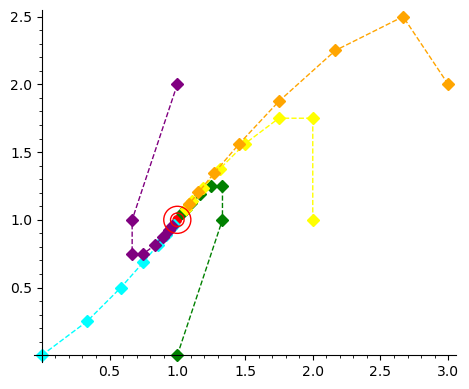

In [13]:
B = matrix([[1, -1/3], [3/4, 0]])
C = vector([1/3, 1/4])

Lista_valores_iniciales=[(0,0),    (1,0),    (2,1),     (3,2),  (1,2)]  # probaremos con diferentes valores iniciales
Lista_colores =         ['cyan', 'green', 'yellow', 'orange', 'purple']

grafica = ( point((1,1), color='red', size=50) 
           + circle((1,1),0.05,color='red') +
           circle((1,1),0.1,color='red'))

for (color, L0) in zip(Lista_colores, Lista_valores_iniciales): 
    # (zip para recorrer las dos listas juntas)
    res = []
    X = vector(RDF, L0)
    for i in range(8):
        res.append(X.list())
        X = B*X + C
    grafica += list_plot(res, color=color, plotjoined=True,linestyle='--',marker='D')
show(grafica)

Para cada una de las cinco aproximaciones inciales elegidas, obtenemos una sucesión de aproximaciones. Las cinco sucesiones son representadas en colores distintos. *(Es interesante observar como, en cada caso, las aproximaciones tienden a seguir una dirección determinada, siempre la misma, para acercarse a la solución. Esto tiene su explicación, en términos de autovectores.)*

#### El método del punto fijo en matemáticas (aparte del álgebra lineal).

La ecuación $X=BX+C$ puede ser escrita de la forma: $X=g(X)$, siendo $g(X)=BX+C$.

Una *gran idea de las matemáticas* es que una ecuación de la forma $x=g(x)$ puede ser "resuelta" (en circonstancias favorables) aplicando de manera repetida la función $g$ a partir de una aproximación inicial $x_0$ de una solución. Este método de resolución se llama **método del punto fijo**. 

En la asignatura de de Cálculo Infinitesimal y Numérico, se presenta la misma idea, aplicada a ecuaciones no-lineales de una variable, como por ejemplo $x=\cos(x)$ o $x=\exp(-x)$. En este caso, la condición de convergencia  "radio espectral $<1$" es reemplazada (entre otras condiciones) por una condición analoga del tipo $|g'|<1$: ver el "Teorema del punto fijo" en dicha asignatura.  


#### Sistemas de ecuaciones lineales en general.

Un sistema de ecuaciones lineales, en general, no se presenta de la forma $X=BX+C$, más bien de la forma $AX=b$.  Un reto ahora es transformar un sistema $AX=b$ en un sistema de la forma $X=BX+ C$, de manera que las sucesiones definidas por el método del punto fijo tiendan a la solución (y, de ser posible, rápidamente).

Vamos a estudiar varios métodos para transformar sistemas $AX=b$ (con tantas ecuaciones como variables, esto es matriz $A$ cuadrada, y solución única) en sistemas $X = BX+C$. Cada uno de estos métodos mejora (pero complica) al anterior:
* el método de [Jacobi](https://es.wikipedia.org/wiki/Carl_Gustav_Jakob_Jacobi).
* el método de [Gauss](https://es.wikipedia.org/wiki/Carl_Friedrich_Gauss)-[Seidel](https://es.wikipedia.org/wiki/Philipp_Ludwig_von_Seidel).
* el método de relajación "SOR" ("**s**uccessive **o**ver**r**elaxation").

(*Jacobi, Gauss, Seidel ... ¿Por qué estos métodos, tan bien adaptados a cálculos con ordenadores, fueron diseñados por matemáticos del siglo XIX?)*

## Método de Jacobi.

Lo introducimos con un ejemplo. Digamos que queremos resolver un sistema de dos ecuaciones en dos variables $AX=b$ con:
$$A=\begin{bmatrix}a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}, \qquad
b = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$$
Poniendo $$X=\begin{bmatrix} x \\ y\end{bmatrix},$$ el sistema es
$$ \left\lbrace \begin{matrix}a_{11} x &+& a_{12} y&=& b_1\\ a_{21} x &+& a_{22} y&=& b_2\end{matrix}\right.$$

> La idea del método de Jacobi es: 
* despejar la primera variable en la primera ecuación, 
* despejar la segunda variable en la segunda ecuación, 
* ... (si hay más ecuaciones y variables se sigue así),

> para poder presentar el sistema en la forma $X=BX+C$.

Despejar $x$ en la primera ecuación da
$$x = (b_1 - a_{12} y)/a_{11}.$$
Despejar $y$ en la segunda ecuación da
$$y=(b_2-a_{21} x)/a_{22}.$$

*(Observación: no es posible si $a_{11}$ o $a_{22}$ es cero).*

El sistema es, por tanto, equivalente a:
$$ (\ast)  \left\lbrace \begin{matrix} x &=& (b_1 - a_{12} y)/a_{11} \\ y&=&(b_2-a_{21} x)/a_{22} \end{matrix}\right.$$
de la forma
$$X=BX+C$$ con 
$$B=\begin{bmatrix} 0  & -\frac{a_{12}}{a_{11}} \\ -\frac{a_{21}}{a_{22}}  & 0\end{bmatrix}, \qquad C=\begin{bmatrix} \frac{b_1}{a_{11}} \\ \frac{b_2}{a_{22}} \end{bmatrix}$$

Se define ahora una sucesión $$X_n = \begin{bmatrix} x_n \\ y_n \end{bmatrix},$$ eligiendo arbitrariamente $X_0$ y definiendo los $X_n$ mediante la relación $X_{n+1}=B X_n + C$. Es decir, en el sistema sustituimos los $x, y$ a la izquierda por $x_{n+1}, y_{n+1}$ y los de la derecha por $x_n, y_n$. Esto da lugar a las formulas:
$$  \left\lbrace \begin{matrix} x_{n+1} &=& (b_1 - a_{12} y_n)/a_{11} \\ y_{n+1}&=&(b_2-a_{21} x_n)/a_{22} \end{matrix}\right.$$


Para tres ecuaciones en tres variables, con un sistema
$$ \left\lbrace \begin{matrix}a_{11} x &+& a_{12} y&+&a_{13}z &=& b_1\\ a_{21} x &+& a_{22} y&+&a_{23}z&=& b_2\\ a_{31}x &+& a_{32} y&+&a_{33}z &=& b_3 \end{matrix}\right.$$
al despejar cada variable de la ecuación que le corresponde obtenemos (a condición que $a_{11}$, $a_{22}$ y $a_{33}$ sean distintos de $0$) el sistema equivalente:
$$ \left\lbrace \begin{matrix}x &=& (b_1-( a_{12} y + a_{13}z))/a_{11}\\y &=& (b_2-( a_{21} x + a_{23}z))/a_{22}\\z &=& (b_3-( a_{31} x + a_{32}y))/a_{33} \end{matrix}\right.$$
Las aproximaciones son entonces definidas por las relaciones:
$$ \left\lbrace \begin{matrix}x_{n+1} &=& (b_1-( a_{12} y_n + a_{13}z_n))/a_{11}\\y_{n+1} &=& (b_2-( a_{21} x_n + a_{23}z_n))/a_{22}\\z_{n+1} &=& (b_3-( a_{31} x_n + a_{32}y_n))/a_{33} \end{matrix}\right.$$

De esta forma, el sistema $AX=b$ se ha reescrito $X=BX+C$ con
$$B=\begin{bmatrix} 0  & -\frac{a_{12}}{a_{11}} & -\frac{a_{13}}{a_{11}} \\ -\frac{a_{21}}{a_{22}}  & 0 & -\frac{a_{23}}{a_{22}} \\   -\frac{a_{31}}{a_{33}} & -\frac{a_{32}}{a_{33}} & 0 \end{bmatrix}, \qquad C=\begin{bmatrix} \frac{b_1}{a_{11}} \\ \frac{b_2}{a_{22}} \\ \frac{b_3}{a_{33}} \end{bmatrix}$$

A continuación, implementamos los cálculos que permiten calcular una aproximación $X_{n+1}$ a partir de la anterior, $X_n$.

In [1]:
def iteracion_Jacobi(X, N, A, b):
    r"""
    Calcula una aproximacion de la solucion del sistema AX=b a partir de la anterior, en el método de Jacobi.
    
    INPUT:
    - X -- vector: aproximación de la solución.
    - N -- entero: longitud de X y b, y orden de A.
    - A -- matriz cuadrada.
    - b -- vector.
    
    OUTPUT: un vector.
    
    Se supone que A no contiene 0 en su diagonal.
    """
    return vector([
        (b[i]-add(A[i,j]*X[j] for j in range(N) if j!=i))/A[i,i] for i in range(N)
    ])

#### Ejemplo.
Aplicamos el método de Jacobi para resolver $Ax=b$ con 
$$A=\left[\begin{array}{cc} 2 & 1\\ 3 & 4\end{array}\right],\quad b=\left[\begin{array}{c} 3\\ 7\end{array}\right]$$

In [15]:
A = matrix(RDF,[[2,1],[3,4]])
b = vector([3,7])
X = vector([0.,0.]) # valor incial arbitrario

for i  in range(21):
    X = iteracion_Jacobi(X, 2, A, b)
    print("X_",i+1,"=", X)


X_ 1 = (1.5, 1.75)
X_ 2 = (0.625, 0.625)
X_ 3 = (1.1875, 1.28125)
X_ 4 = (0.859375, 0.859375)
X_ 5 = (1.0703125, 1.10546875)
X_ 6 = (0.947265625, 0.947265625)
X_ 7 = (1.0263671875, 1.03955078125)
X_ 8 = (0.980224609375, 0.980224609375)
X_ 9 = (1.0098876953125, 1.01483154296875)
X_ 10 = (0.992584228515625, 0.992584228515625)
X_ 11 = (1.0037078857421875, 1.0055618286132812)
X_ 12 = (0.9972190856933594, 0.9972190856933594)
X_ 13 = (1.0013904571533203, 1.0020856857299805)
X_ 14 = (0.9989571571350098, 0.9989571571350098)
X_ 15 = (1.0005214214324951, 1.0007821321487427)
X_ 16 = (0.9996089339256287, 0.9996089339256287)
X_ 17 = (1.0001955330371857, 1.0002932995557785)
X_ 18 = (0.9998533502221107, 0.9998533502221107)
X_ 19 = (1.0000733248889446, 1.000109987333417)
X_ 20 = (0.9999450063332915, 0.9999450063332915)
X_ 21 = (1.0000274968333542, 1.0000412452500314)


##### Algunas condiciones suficientes de convergencia del método de Jacobi.

Se dice que una matriz $A$ es *diagonal dominante por filas* o, simplemente, *diagonal dominante* si verifica que para cualquiera fila, el valor absoluto del coeficiente de la diagonal es estrictamente mayor que la suma de los valores absolutos de los otros coeficientes de la fila:
$$|a_{ii}|>\sum_{j\,|\;j\neq i} |a_{ij}|,$$

> **Teorema.** Si $A$ es una matriz cuadrada y diagonal dominante entonces tiene inversa.



> **Teorema.** Si $A$ es una matriz diagonal dominante entonces el método de Jacobi para $AX=b$ converge para cualquier valor inicial $X_0$.


#### Ejemplo.

Aplicamos el método de Jacobi para el sistema $AX=b$ con

$$A=\left[\begin{array}{cc} 3 & 1 & 0\\ 1 & 3 & 1 \\ 0 & 1 & 3\end{array}\right],\quad b=\left[\begin{array}{c} 1 \\ 1 \\ 1\end{array}\right]$$

Como $A$ es de diagonal dominante, sabemos que el método converge.

In [16]:
A = matrix(RDF,[[3,1,0],[1,3,1],[1,1,3]])
b = vector([1,1,1])
X = vector([0,0,0]) # valor incial arbitrario
for i  in range(10):
    X = iteracion_Jacobi(X, 3, A, b)
    print("X_",i+1,"=", X)

X_ 1 = (0.3333333333333333, 0.3333333333333333, 0.3333333333333333)
X_ 2 = (0.22222222222222224, 0.11111111111111112, 0.11111111111111112)
X_ 3 = (0.2962962962962963, 0.2222222222222222, 0.2222222222222222)
X_ 4 = (0.25925925925925924, 0.16049382716049385, 0.16049382716049385)
X_ 5 = (0.27983539094650206, 0.1934156378600823, 0.1934156378600823)
X_ 6 = (0.26886145404663925, 0.17558299039780523, 0.17558299039780523)
X_ 7 = (0.27480566986739824, 0.1851851851851852, 0.1851851851851852)
X_ 8 = (0.2716049382716049, 0.18000304831580552, 0.18000304831580552)
X_ 9 = (0.27333231722806484, 0.18279733780419652, 0.18279733780419652)
X_ 10 = (0.2724008873986012, 0.18129011498924621, 0.18129011498924621)


#### El error residual.

¿Cuántas iteraciones realizar para obtener una buena aproximación de la solución? Si queremos una aproximación de la solución $\bar{X}$ del sistema con una precisión dada (digamos un error $\le \varepsilon$), basta interrumpir el cálculo cuando $||X_n - \bar{X}|| \le \varepsilon$. Pero no podemos realizar este test, ya que no conocemos $\bar{X}$, que es precisamente lo que pretendemos calcular.

Un posible criterio de parada es obtener un valor pequeño para $||A X_n - b||$ (el llamado "error residual"). En el ejemplo anterior continuaremos los calculos hasta tener un error residual $< 10^{-8}$.

Este criterio de parada ("error residual pequeño") no siempre es razonable: hay sistemas y aproximaciones de la solución con error residual pequeño, pero error grande de la aproximación (ver el ultimo ejemplo de la práctica).

In [17]:
A = matrix(RDF,[[3,1,0],[1,3,1],[1,1,3]])
b = vector([1,1,1])
error_residual = 10^(-8)

X = vector([0,0,0]) # valor incial

for i  in range(1000):
    if (A*X-b).norm() <= error_residual:
        print("X_",i,"=", X)
        break   # salida anticipada del bucle con error residual menor o igual al especificado
    else:
        X = iteracion_Jacobi(X, 3, A, b)
else: # este bloque se ejecutará solamente si se termina el bucle sin "break" 
    print("No se alcanzó la precisión deseada.")

X_ 31 = (0.2727272734909388, 0.1818181830538194, 0.1818181830538194)


Comprobamos [de visu](https://es.wikipedia.org/wiki/De_visu):

In [18]:
A*X  # debe dar un valor próximo al vector b

(1.0000000035266359, 1.0000000057062164, 1.0000000057062164)

#### Ejemplo: cuando debemos reordenar las ecuaciones.

Queremos resolver por el método de Jacobi el sistema $AX=b$, con
$$A=\left[\begin{array}{cc} 0 & 1 & 3\\ 2 & 1 & 1 \\ 1 & 4 & 1\end{array}\right],\quad b=\left[\begin{array}{c} 1 \\ 5 \\ 7\end{array}\right]$$

No es posible, ya que $A$ tiene un cero en la diagonal. Pero basta cambiar el orden de las ecuaciones para superar esta dificultad.

In [19]:
A = matrix(RDF,[[0,1,3],[2,1,1],[0,4,1]])
b = vector([1,5,7])
show(A.augment(b))
M = A.augment(b) # matriz ampliada

MM = matrix([M.row(1),M.row(2), M.row(0)]) # las filas de MM son las filas 1,2,0 de M, en este orden

# separamos la matriz ampliada en matriz de coefcientes AA + columna de los terminos indep.
AA = MM.matrix_from_columns([0,1,2])
bb = MM.column(-1)
## AA X = bb es equivalente a AX=b
show(AA.augment(bb))

[0.0 1.0 3.0 1.0]
[2.0 1.0 1.0 5.0]
[0.0 4.0 1.0 7.0]

[2.0 1.0 1.0 5.0]
[0.0 4.0 1.0 7.0]
[0.0 1.0 3.0 1.0]

In [20]:
# Aplicamos ahora el método de Jacobi
X = vector([0,0,0]) # valor inicial arbitrario
for i  in range(1000):
    if (AA*X-bb).norm() < 10^(-8):
        print("X_",i,"=", X)
        break   # salida anticipada del bucle
    else:
        X = iteracion_Jacobi(X, 3, AA, bb)
else: # este bloque se ejecutará solamente si se termina el bucle sin "break" 
    print("No se alcanzó la precisión deseada.")

X_ 17 = (1.727272729069844, 1.818181818023249, -0.27272727131776947)


## Método de Gauss Seidel.

Es una mejora del método de Jacobi.

Volvemos al caso de un sistema de dos ecuaciones en dos incógnitas. En el método de Jacobi, cada aproximación es definida a partir de la anterior mediante las formulas:
$$  \left\lbrace \begin{matrix} x_{n+1} &=& (b_1 - a_{12} y_n)/a_{11} \\ y_{n+1}&=&(b_2-a_{21} x_n)/a_{22} \end{matrix}\right.$$

> *Idea del método de Gauss-Seidel:*
En la segunda formula, ¿por qué no utilizar $x_{n+1}$ que acaba de ser calculado, en vez de $x_n$? (Se supone que $x_{n+1}$ es "mejor" que $x_n$)

Esto da lugar a las formulas:
$$  \left\lbrace \begin{matrix} x_{n+1} &=& (b_1 - a_{12} y_n)/a_{11} \\ y_{n+1}&=&(b_2-a_{21} x_{\color{red}{n+1}})/a_{22} \end{matrix}\right.$$

Para un sistema de 3 ecuaciones en 3 variables, las formulas en el método de Jacobi son:
$$ \left\lbrace \begin{matrix}x_{n+1} &=& (b_1-( a_{12} y_n + a_{13}z_n))/a_{11}\\y_{n+1} &=& (b_2-( a_{21} x_n + a_{23}z_n))/a_{22}\\z_{n+1} &=& (b_3-( a_{31} x_n + a_{32}y_n))/a_{33} \end{matrix}\right.$$
En el método de Gauss-Seidel, utilizaremos $x_{n+1}$ e $y_{n+1}$ en vez de $x_n$ e $y_n$, cuando estos números harán sido calculados. Las formulas serán, por tanto:
$$ \left\lbrace \begin{matrix}x_{n+1} &=& (b_1-( a_{12} y_n + a_{13}z_n))/a_{11}\\y_{n+1} &=& (b_2-( a_{21} x_{\color{red}{n+1}} + a_{23}z_n))/a_{22}\\z_{n+1} &=& (b_3-( a_{31} x_{\color{red}{n+1}} + a_{32}y_{\color{red}{n+1}}))/a_{33} \end{matrix}\right.$$

In [2]:
def iteracion_Gauss_Seidel(X, N, A, b):
    r"""
    Calcula una aproximación de la solución del sistema AX=b a partir de la anterior,
    por el método de Gauss-Seidel.
    
    INPUT:
    - X -- vector: aproximación de la solución.
    - N -- entero: longitud de X y b, y orden de A.
    - A -- matriz cuadrada.
    - b -- vector.
    
    OUTPUT: un vector.
    
    Se supone que A es sin 0 en su diagonal.
    """
    for i in range(N):
        X[i] = (b[i] - add(A[i,j]*X[j] for j in range(N) if j!=i))/A[i,i]
    return copy(X)

#### Ejemplo.

Aplicamos el método de Gauss-Seidel para resolver $Ax=b$ con 
$$A=\left[\begin{array}{cc} 2 & 1\\ 3 & 4\end{array}\right],\quad b=\left[\begin{array}{c} 3\\ 7\end{array}\right]$$

In [22]:
A = matrix(RDF,[[2,1],[3,4]])
b = vector(RDF, [3,7])
X = vector([0.,0.]) # valor inicial arbitrario

for i  in range(21):
    X = iteracion_Gauss_Seidel(X, 2, A, b)
    print("X_", i+1,"=", X,", error residual=", (A*X-b).norm())

X_ 1 = (1.50000000000000, 0.625000000000000) , error residual= 0.625
X_ 2 = (1.18750000000000, 0.859375000000000) , error residual= 0.234375
X_ 3 = (1.07031250000000, 0.947265625000000) , error residual= 0.087890625
X_ 4 = (1.02636718750000, 0.980224609375000) , error residual= 0.032958984375
X_ 5 = (1.00988769531250, 0.992584228515625) , error residual= 0.012359619140625
X_ 6 = (1.00370788574219, 0.997219085693359) , error residual= 0.004634857177734375
X_ 7 = (1.00139045715332, 0.998957157135010) , error residual= 0.0017380714416503906
X_ 8 = (1.00052142143250, 0.999608933925629) , error residual= 0.0006517767906188965
X_ 9 = (1.00019553303719, 0.999853350222111) , error residual= 0.0002444162964820862
X_ 10 = (1.00007332488894, 0.999945006333292) , error residual= 9.165611118078232e-05
X_ 11 = (1.00002749683335, 0.999979377374984) , error residual= 3.437104169279337e-05
X_ 12 = (1.00001031131251, 0.999992266515619) , error residual= 1.2889140634797513e-05
X_ 13 = (1.00000386674219, 

Observamos, efectivamente, una convergencia más rápida que con el método de Jacobi.

> **Teorema.** Si $A$ es una matriz diagonal dominante entonces el método de Gauss-Seidel converge para cualquier valor inicial $X_0$.

> **Teorema.** Si $A$ es una matriz simétrica y definida positiva entonces el método de Gauss-Seidel converge para cualquier valor inicial $X_0$.

## Método S.O.R. (de relajación)

El método SOR es una mejora del método de Gauss-Seidel. Aplica "relajación", una técnica general de mejora de los métodos iterativos en cálculo numérico, e involucra un paramétro $\omega$ que hay que ajustar para obtener un buen comportamiento.

La idea es la siguiente: partiendo de una aproximación $x_n$ de algún número, tenemos un metodo que proporciona una nueva aproximación $x'_{n+1}$. En vez de utilizar este número como nueva aproximación, calculamos *otra* nueva aproximación $x_{n+1}$ mediante:
$$x_{n+1} =   x_n + \omega (x'_{n+1} - x_n).$$

En el caso que nos interesa, $x'_{n+1}$ es la aproximación proporcionada por las formulas de la iteración de Gauss-Seidel. Aplicamos esta "relajación" para cada cálculo de componente.

#### Ejemplo:

Aplicamos el método SOR con $\omega=1.2$ para resolver $Ax=b$ con 
$$A=\left[\begin{array}{cc} 2 & 1\\ 3 & 4\end{array}\right],\quad b=\left[\begin{array}{c} 3\\ 7\end{array}\right]$$

Empezamos con $X_0=\begin{bmatrix} x_0 \\ y_0 \end{bmatrix}=\begin{bmatrix} 1 \\ 2 \end{bmatrix}$. 
Utilizamos la formula de Gauss_Seidel para $x_1$ para calcular un "borrador" $x'_1$ de $x_1$: 
$$x'_1 = (3 - 1 \times 2)/2 = 0.5$$
e inmediatamente aplicamos relajación:
$$x_1  = x_0 + \omega (x'_1-x_0) = 1 + 1.2 \times (0.5-1) = 0.4$$

Luego utilizamos la formula de Gauss-Seidel para $y_1$, calculando con ella un "borrador" $y'_1$ de $y_1$:
$$y'_1 = (7-3  x_1)/4 =  (7-3 \times 0.4)/4 = 1.45  $$
Ahora aplicamos relajación para calcular $y_1$:
$$y_1  = y_0 + \omega (y'_1-y_0) = 2 + 1.2 \times (1.45-2) = 1.34$$

La nueva aproximación es, por tanto, $X_1=\begin{bmatrix} 0.4 \\ 1.34 \end{bmatrix}$.
Seguimos así en los pasos siguientes.

A continuación, implementamos el método SOR y lo aplicamos al ejemplo anterior.

In [3]:
def iteracion_SOR(X, omega, N, A, b):
    for i in range(N):
        xx = (b[i] - add(A[i,j]*X[j] for j in range(N) if j!=i))/A[i,i] # formula Gauss-Seidel
        X[i] = X[i] + omega*(xx-X[i]) # relajación
    return X


In [24]:
A = matrix(RDF,[[2,1],[3,4]])
b = vector([3,7])
X = vector([1.,2]) # valor inicial arbitrario
omega = 1.2  # valor de relajación elegido

for i  in range(10):
    X = iteracion_SOR(X,omega,2,A,b)
    print("X_", i+1,"=", X)

X_ 1 = (0.400000000000000, 1.34000000000000)
X_ 2 = (0.916000000000000, 1.00760000000000)
X_ 3 = (1.01224000000000, 0.987464000000000)
X_ 4 = (1.00507360000000, 0.997940960000000)
X_ 5 = (1.00022070400000, 1.00021317440000)
X_ 6 = (0.999827954560000, 1.00011220601600)
X_ 7 = (0.999967085478400, 1.00000718186624)
X_ 8 = (1.00000227378458, 0.999996517220634)
X_ 9 = (1.00000163491070, 0.999999225136239)
X_ 10 = (1.00000013793612, 1.00000003083025)


¿Cómo elegir el paraḿetro $\omega$ de manera que obtengamos una convergencia rápida? ¡Es un problema que no tiene solución simple!

> **Teorema.** Una condición necesaria para que converja el método de relajación es que $\omega\in(0,2)$. Esto significa que si $\omega \le 0$, o $\omega \ge 2$, entonces no se tendrá convergencia (excepto para algunos valores iniciales excepcionales).

> **Teorema .** Si $A$ es diagonal dominante, entonces el método de relajación es convergente cualquiera que sea $\omega\in(0,1]$.

> **Teorema .** Si $A$ es simétrica y definida positiva, entonces el método de relajación converge si, y sólo si, $\omega\in(0,2).$

Aplicaremos el método S.O.R., para varios valores de $\omega$, para el sistema $AX=b$ con $$A=\begin{bmatrix} 2 & 1\\ 3 & 4\end{bmatrix},\quad b=\begin{bmatrix} 3\\ 7\end{bmatrix}.$$

In [25]:
A = matrix(RDF,[[2,1],[3,4]])
b = vector([3,7])

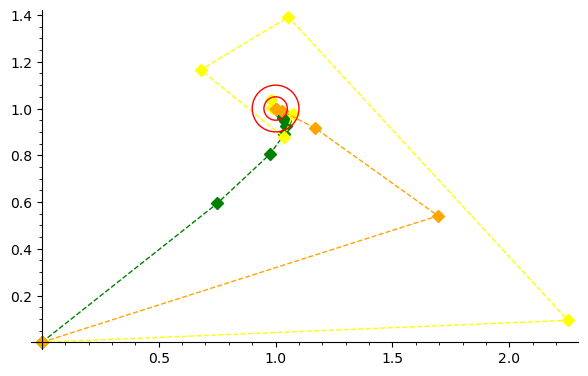

In [26]:
Lista_colores = ['green', 'yellow', 'orange']
Lista_omega =   [0.5,      1.5,       1.13  ]

grafica = ( point((1,1), color='red', size=50) 
           + circle((1,1),0.05,color='red') +
           circle((1,1),0.1,color='red'))

for (color, omega) in zip(Lista_colores, Lista_omega):
    X = vector([0.,0.])
    res = [list(X)]
    for i in range(8):
        res.append(X.list())
        X = iteracion_SOR(X, omega, 2, A, b)
    grafica += list_plot(res, color=color, plotjoined=True,linestyle='--',marker='D')
show(grafica)

Para cada uno de los valores de $\omega$, obtenemos una sucesión de aproximaciones en un color diferente. Las tres sucesiones convergen al mismo vector solución pero la de color verde toma el recorrido más corto *(mayor velocidad de convergencia)*.

## Matrices de los métodos.

En cada uno de los tres métodos, el sistema $AX=b$ se transforma en un sistema $X = BX+C$. Llameremos la matriz $B$ "matriz del método". Su radio espectral determina la convergencia, o no convergencia, del método (el radio espectral tiene que ser menor que $1$ para tener convergencia), y, en caso de convergencia, su velocidad de convergencia (cuanto más pequeño es el radio espectral, más rápida es la convergencia). 


Al *aplicar* los métodos, no necesitamos calcular la matriz del método. Sin embargo, vamos a realizar aquí el cálculo de las matrices de los métodos de Jacobi, de Gauss-Seidel, y SOR, para hacer un estudio teórico.


* En el caso del método de Jacobi, descomponemos $A$ en $A=D + (A-D)$, donde $D$ es la parte diagonal de $A$. Por ejemplo, 
para $$A=\begin{bmatrix}\color{red}{a_{11}} & a_{12} & a_{13} \\a_{21} & \color{red}{a_{22}} & a_{23} \\a_{31} & a_{32} & \color{red}{a_{33}} \end{bmatrix},$$
se tiene
$$D=\begin{bmatrix}a_{11} & 0 & 0 \\ 0 & a_{22} & 0 \\0 & 0 & a_{33} \end{bmatrix},\qquad
A-D=\begin{bmatrix} 0 & a_{12} & a_{13} \\a_{21} & 0 & a_{23} \\a_{31} & a_{32} & 0 \end{bmatrix}$$
Entonces la matriz del método de Jacobi es $$B=D^{-1}(D-A).$$

* En el caso del método de Gauss-Seidel, descomponemos $A$ en $A=L + (A-L)$. donde $L$ es la parte triangular inferior de $A$, diagonal incluída. Para
$$A=\begin{bmatrix} \color{red}{a_{11}} & a_{12} & a_{13} \\\color{red}{a_{21}} & \color{red}{a_{22}} & a_{23} \\\color{red}{a_{31}} & \color{red}{a_{32}} & \color{red}{a_{33}} \end{bmatrix},$$
se tiene
$$L=\begin{bmatrix} a_{11}&0&0  \\a_{21} & a_{22}&0 \\a_{31} & a_{32} & a_{33} \end{bmatrix},\qquad
A-L=\begin{bmatrix}0 & a_{12} & a_{13} \\0 & 0 & a_{23} \\0&0&0 \end{bmatrix}$$
Entonces la matriz del método de Gauss-Seidel es $B=L^{-1}(A-L).$

* En el caso del método SOR, se puede mostrar que la matriz del método es $$B=(D+\omega E)^{-1} \left((1-\omega)D - \omega F \right),$$
siendo $D$ la parte diagonal de $A$, $E$ la parte triangular inferior (diagonal excluida) y $F$ la parte triangular superior (diagonal excluida).

Por ejemplo, para $$A=\begin{bmatrix}\color{red}{a_{11}} & a_{12} & a_{13} \\\color{blue}{a_{21}} & \color{red}{a_{22}} & a_{23} \\\color{blue}{a_{31}} & \color{blue}{a_{32}} & \color{red}{a_{33}} \end{bmatrix},$$
se tiene
$$D=\begin{bmatrix}a_{11} & 0 & 0 \\ 0 & a_{22} & 0 \\0 & 0 & a_{33} \end{bmatrix},\quad
E=\begin{bmatrix} 0&0&0  \\a_{21} & 0&0 \\a_{31} & a_{32} & 0 \end{bmatrix},\quad
F= \begin{bmatrix}0 & a_{12} & a_{13} \\0 & 0 & a_{23} \\0&0&0 \end{bmatrix}.$$

#### Ejemplo 10

Consideremos el sistema
$$\left(\begin{array}{rrrrrrr}10 &    2    & -3   &   2   &  -4 &3  &0\\    -2   & -12    &  5   &   0    &  0    &  2    &  1\\     1    &  1  &    8   &   1    &  1   &   1    &  1\\    -1    &  0    &  4    & 15   &  -5    & -1   &  -2\\     1    &  0   &   1    &  0   &   5    &  0   &   1\\     0   &   0    & -1   &  -2   &  -3    & -8    &  1\\     1    & -2  &   -3   &   0    &  2    &  3    & 12\end{array}\right)  \left(\begin{array}{r} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7 \end{array}\right)=\left(\begin{array}{r} 10 \\ -6 \\ 14 \\ 10 \\ 8 \\ -13 \\13 \end{array}\right)$$

1. Hacer un estudio previo sobre la convergencia de los métodos iterativos de Jacobi y  de Gauss-Seidel para saber cuál converge con mayor velocidad (determinar los radios espectrales de las matrices de los métodos).
2. Encontrar un $\omega \in (0,2)$ que haga que el método S.O.R. sea más rápido que el de Jacobi y el de Gauss-Seidel.
3. Resolver el sistema por Jacobi, Gauss-Seidel y por  S.O.R. con un $\omega$ adecuado, comparando el número de iteraciones necesarias en cada método para llegar a la solución aproximada con un error residual  $< 10^{-12}$.

In [27]:
A = matrix(RDF, 
[
[10, 2, -3, 2, -4, 3, 0],
[-2, -12, 5, 0, 0, 2, 1],
[1, 1, 8, 1, 1, 1, 1],
[-1, 0, 4, 15, -5, -1, -2],
[1, 0, 1, 0, 5, 0, 1],
[0, 0, -1, -2, -3, -8, 1],
[1, -2, -3, 0, 2, 3, 13]
])
show(A)
b = vector([10, -6, 14, 10, 8, -13, 14])
show(b)

[ 10.0   2.0  -3.0   2.0  -4.0   3.0   0.0]
[ -2.0 -12.0   5.0   0.0   0.0   2.0   1.0]
[  1.0   1.0   8.0   1.0   1.0   1.0   1.0]
[ -1.0   0.0   4.0  15.0  -5.0  -1.0  -2.0]
[  1.0   0.0   1.0   0.0   5.0   0.0   1.0]
[  0.0   0.0  -1.0  -2.0  -3.0  -8.0   1.0]
[  1.0  -2.0  -3.0   0.0   2.0   3.0  13.0]

(10, -6, 14, 10, 8, -13, 14)

Calculamos las matrices $J$ y $G$ de los métodos de Jacobi y de Gauss-Seidel, y sus radios espectrales.

In [28]:
# Jacobi: matriz J
D = diagonal_matrix(A.diagonal())
J = D.inverse()*(D-A)
J.eigenvalues()

[-0.2735362906380897 + 0.23081641973750922*I,
 -0.2735362906380897 - 0.23081641973750922*I,
 -0.005468105842221257 + 0.3629247815315212*I,
 -0.005468105842221257 - 0.3629247815315212*I,
 0.08680021467701175,
 0.23560428914180515 + 0.23565257535753098*I,
 0.23560428914180515 - 0.23565257535753098*I]

Observamos que algunos de los autovalores de J son complejos. Para comparar mejor, consideramos los valores absolutos.

In [29]:
list(map(abs, J.eigenvalues())) # = aplicar "abs" a cada termino de la lista de autovalores

[0.3579082590783391,
 0.3579082590783391,
 0.3629659725528057,
 0.3629659725528057,
 0.08680021467701175,
 0.3332289263174074,
 0.3332289263174074]

In [30]:
max(map(abs, J.eigenvalues()))

0.3629659725528057

El radio espectral de $J$ es por tanto aproximadamente 0.36.

In [31]:
# Gauss-Seidel: matriz G
L = matrix(RDF, 7, 7, lambda i,j: 0 if i < j else A[i,j])
G = L.inverse()*(A-L)
G.eigenvalues()

[0.0,
 -0.12346225832299837 + 0.08572787313826924*I,
 -0.12346225832299837 - 0.08572787313826924*I,
 0.18450073674409784 + 0.04848811789782376*I,
 0.18450073674409784 - 0.04848811789782376*I,
 -2.2467019769197398e-17,
 0.025989282474040396]

In [32]:
# valores absolutos de los autovalores de la matriz del método de Gauss-Seidel
list(map(abs, G.eigenvalues()))

[0.0,
 0.15030701069153748,
 0.15030701069153748,
 0.19076587597468303,
 0.19076587597468303,
 2.2467019769197398e-17,
 0.025989282474040396]

In [33]:
max(map(abs, G.eigenvalues()))

0.19076587597468303

El radio espectral del método de Gauss-Seidel es menor que el del método de Jacobi, pero ambos son $<1$ (valen respectivamente  0.19 y 0.36). Por tanto, ambos métodos convergen, pero el método de Gauss-Seidel será más rápido.

**Nota sobre el uso del radio espectral para determinar si un método es convergente:**
*A lo largo de esta práctica se utiliza con frecuencia el radio espectral de distintas matrices. Nuestro objetivo es puramente académico, con idea de entender la convergencia y su velocidad en pequeños ejemplos comparativos entre distintos métodos iterativos. No obstante, el cálculo efectivo del radio espectral es un problema de cálculo numérico tan complejo o más que la propia resolución de los sistemas lineales (como estudiaremos en el último tema de la asignatura), por lo que en problemas reales y con matrices grandes no se recurre al radio espectral sino a otros criterios de convergencia más sencillos.*

Para hallar un paramétro $\omega$ apropiado en el método SOR, podemos probar mediante tanteo en el intervalo $(0,2)$ ó utilizar un pequeño bucle que calcule los valores de los radios espectrales para $\omega$ entre 0 y 2 con incrementos de 0.1 y, en un segundo bucle similar, afinamos una segunda cifra decimal con incrementos de 0.01. De forma visual, localizamos los valores óptimos, correspondientes al menor radio espectral

0.000000000000000 1.0
0.100000000000000 0.922819757738464
0.200000000000000 0.8441471032759666
0.300000000000000 0.7639787886799371
0.400000000000000 0.6823314129731725
0.500000000000000 0.5992303814295336
0.600000000000000 0.5146600301430895
0.700000000000000 0.4284407047592237
0.800000000000000 0.34000055723963574
0.900000000000000 0.2479826602128392
1.00000000000000 0.19076587597468334
1.10000000000000 0.39286843951604966
1.20000000000000 0.5920872970351831
1.30000000000000 0.78497803843898
1.40000000000000 0.97791642741401
1.50000000000000 1.1726629715311705
1.60000000000000 1.3700499362228569
1.70000000000000 1.5706713541646111
1.80000000000000 1.7751167730137989
1.90000000000000 1.984071166546882
2.00000000000000 2.1983481750163008


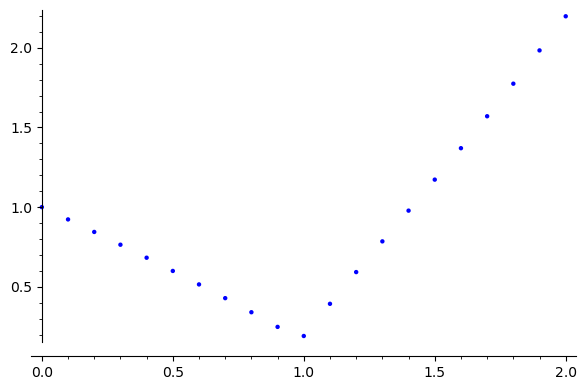

In [34]:
# Descomposición de la matriz A
D = diagonal_matrix(A.diagonal())
E = matrix(RDF, 7,7, lambda i,j: 0 if i <= j else A[i,j])
F = matrix(RDF, 7,7, lambda i,j: 0 if i >= j else A[i,j])
res = []
# Bucle para probar valores de omega
for omega in [0, 0.1 .. 2]: 
    S = (D + omega*E).inverse()*((1 - omega)*D - omega*F)
    # Cada vez calculamso el radio espectral
    rho = max(abs(t) for t in S.eigenvalues())
    res.append( (omega, rho) )
    print(omega, rho)
list_plot(res)

Vemos que conviene buscar el $\omega$ que minimiza el radio espectral de $S$, entre 0.9 y 1.1. Repetimos la busqueda, en este intervalo.

0.900000000000000 0.24798266021283952
0.910000000000000 0.2384944351656273
0.920000000000000 0.22894196477096548
0.930000000000000 0.21932243727169626
0.940000000000000 0.20963370695710593
0.950000000000000 0.19987490078995554
0.960000000000000 0.1900474500832398
0.970000000000000 0.18015686752154986
0.980000000000000 0.17021585745417978
0.990000000000000 0.17664865241792405
1.00000000000000 0.19076587597468303
1.01000000000000 0.20506856426442774
1.02000000000000 0.2194908976003678
1.03000000000000 0.23398905187225982
1.04000000000000 0.24853302880843878
1.05000000000000 0.2688729626097567
1.06000000000000 0.30199525492394685
1.07000000000000 0.3268693354439182
1.08000000000000 0.3497638767071131
1.09000000000000 0.3716367137427919
1.10000000000000 0.3928684395160508


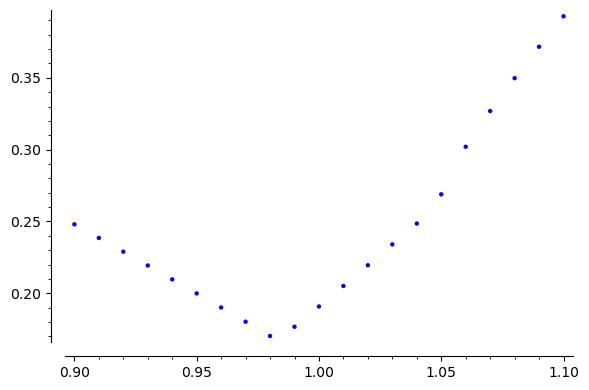

In [35]:
res = []
for omega in [0.9, 0.91 .. 1.1]:
    S = (D + omega*E).inverse()*((1 - omega)*D - omega*F)
    rho = max(abs(t) for t in S.eigenvalues())
    res.append( (omega, rho) )
    print(omega, rho)
list_plot(res)

El valor optimo encontrado con este método es $\omega = 0.98$.

Comparamos los tres métodos.

In [36]:
# Jacobi
X = vector(RDF,[0]*7)
for i in range(1000):
    if (A*X-b).norm() < 10^(-12):
        print(i, X)
        break
    X = iteracion_Jacobi(X, 7, A, b)
else:
    print("No se alcanzó la precisión deseada.")
    print(i, X)

31 (0.99999999999997, 0.9999999999999606, 0.9999999999999697, 0.9999999999999996, 0.9999999999999709, 0.9999999999999911, 1.000000000000014)


In [37]:
# Gauss-Seidel
X = vector(RDF,[0]*7)
for i in range(1000):
    if (A*X-b).norm() < 10^(-12):
        print(i, X)
        break
    X = iteracion_Gauss_Seidel(X, 7, A, b)
else:
    print("No se alcanzó la precisión deseada.")
    print(i, X)

20 (0.9999999999999488, 1.0000000000000127, 0.9999999999999954, 0.999999999999968, 1.0000000000000142, 1.0000000000000013, 1.0000000000000022)


In [38]:
# SOR con omega = 0.98
X = vector(RDF,[0]*7)
for i in range(1000):
    if (A*X-b).norm() < 10^(-12):
        print(i, X)
        break
    X = iteracion_SOR(X, 0.98, 7, A, b)
else:
    print("No se alcanzó la precisión deseada.")
    print(i, X)

19 (0.9999999999999689, 0.9999999999999966, 0.9999999999999971, 1.0000000000000024, 1.0000000000000049, 0.9999999999999994, 1.0000000000000007)


Bastaron:
* 31 iteraciones con el método de Jacobi
* 20 con el método de Gauss-Seidel
* 19 con el método SOR con $\omega=0.98$
para alcanzar la precisión deseada.

Como conclusión, el método más eficiente ha sido el de relajación aunque el coste computacional para encontrar el valor $\omega$ adecuado ha sido muy superior al coste de cualquiera de los otros dos métodos. **No es práctica esta forma de encontrar un valor óptimo para el parámetro de relajación**. Debe entenderse este ejercicio como una ilustración de la importancia de elegir un valor del parámetro $\omega$  adecuado y su repercusión sobre la velocidad de convergencia.

#### Ejemplo  (sistema mal condicionado).

Consideremos el sistema $5 \times 5$ de matriz de coeficientes $A=\left( \frac{1}{i+j-1}\right)_{1 \le i,j \le 5}$ y solución el vector $x=(1,-1,1,-1,1)$, tomando como vector de términos independientes el valor de $b=Ax$. Se pide:
1. Hacer un estudio previo sobre la convergencia de los métodos iterativos de Jacobi, de Gauss-Seidel y de relajación para $\omega =0.1$, para saber cuál de ellos converge con mayor velocidad.
2. Aplicar los tres métodos iterados hasta obtener un error residual $ < 10^{-6}$  y sopesar qué está ocurriendo.

(Nota: la matriz $A$ es conocida como matriz de Hilbert y es un buen ejemplo de matriz muy mal condicionada para sistemas de ecuaciones.Son muy usadas para poner de manifiesto las dificultades numéricas de algunos métodos numéricos.)

In [39]:
A = matrix(RDF, 5, 5, lambda i,j: 1/(i+j+1)) # matriz de Hilbert de orden 5
X_exacto = vector(RDF, [1, -1, 1, -1, 1])
b = A*X_exacto ### calculamos b para que la solución sea la propuesta en el enunciado
show(A)

[                1.0                 0.5  0.3333333333333333                0.25                 0.2]
[                0.5  0.3333333333333333                0.25                 0.2 0.16666666666666666]
[ 0.3333333333333333                0.25                 0.2 0.16666666666666666 0.14285714285714285]
[               0.25                 0.2 0.16666666666666666 0.14285714285714285               0.125]
[                0.2 0.16666666666666666 0.14285714285714285               0.125  0.1111111111111111]

Determinamos las matrices J, G, S de los tres métodos y sus radios espectrales.

In [40]:
# Jacobi
D = diagonal_matrix(A.diagonal())
J = D.inverse()*(A-D)
rho_J = max(abs(t) for t in J.eigenvalues())
rho_J

3.444142191165952

El método de Jacobi diverge aquí, ya que el radio espectral de la matriz del método es $>1$.

In [41]:
# Gauss-Seidel
L = matrix(5, 5, lambda i,j: 0 if i < j else A[i,j])
G = L.inverse()*(A-L)
rho_G= max(abs(t) for t in G.eigenvalues())
rho_G

0.9999576712229572

In [42]:
# SOR con omega = 0.1
omega = 0.1
E = matrix( 5, 5, lambda i,j: 0 if i <= j else A[i,j])
F = matrix(5, 5, lambda i,j: 0 if i >= j else A[i,j])
D = diagonal_matrix(A.diagonal())
S = (D + omega*E).inverse()*((1 - omega)*D - omega*F)
rho_S = max(abs(t) for t in S.eigenvalues())
rho_S

0.9999977774173188

Los radios espectrales de las matrices de los métodos de Gauss-Seidel y SOR ($\omega$=0.1) son $<1$ pero muy cerca de $1$: los dos métodos van a converger, pero muy lentamente, y SOR más lentamente que Gauss-Seidel.

In [43]:
# Jacobi; para constatar la divergencia
X = vector(RDF,[0]*5)
for i in range(100):
    if (A*X-b).norm() < 10^(-6):
        print(i, X)
        break
    X = iteracion_Jacobi(X, 5, A, b)
else:
    print("No se alcanzó la precisión deseada.")
    print(i, X)

No se alcanzó la precisión deseada.
99 (-5.955186114777215e+52, -1.2437158689781507e+53, -1.6266997690077658e+53, -1.8866962910841102e+53, -2.0764275590948073e+53)


In [44]:
# Gauss-Seidel
X = vector(RR,[0]*5)
for i in range(100):
    if (A*X-b).norm() < 10^(-6):
        print(i, X)
        break
    X = iteracion_Gauss_Seidel(X, 5, A, b)
else:
    print("No se alcanzó la precisión deseada.")
    print(i, X)

No se alcanzó la precisión deseada.
99 (0.990735844728053, -0.812726932436216, 0.151960636911040, 0.322743990855607, 0.338015212402790)


Repetimos con más pasos.

In [45]:
# Gauss-Seidel
X = vector(RR,[0]*5)
for i in range(100000):
    if (A*X-b).norm() < 10^(-6):
        print(i, X)
        break
    X = iteracion_Gauss_Seidel(X, 5, A, b)
else:
    print("No se alcanzó la precisión deseada.")
    print(i, X)

45951 (0.998380532797291, -0.970271735008125, 0.873347121519316, -0.810380776654773, 0.907840432403136)


In [46]:
A*X-b

(-6.855006595696267e-08, 3.8517866718379423e-07, -7.804720379978036e-07, 4.876458651326132e-07, 0.0)

Observese que a pesar de tener un error residual pequeño, el error de la aproximación es bastante grande:

In [47]:
X_exacto = vector(RDF,[1,-1,1,-1,1])
(X-X_exacto).norm() / X_exacto.norm() # error relativo

0.110793663900585

El error relativo es de 11 %.

In [49]:
# SOR
omega = 0.1
X = vector(RDF,[0]*5)
for i in range(100000):
    if (A*X-b).norm() < 10^(-6):
        print(i, X)
        break
    else:
        X = iteracion_SOR(X, omega, 5, A, b)
else:
    print("No se alcanzó la precisión deseada.")
    print(i, X)

No se alcanzó la precisión deseada.
99999 (0.990381565102128, -0.8202147606727231, 0.22535259343614544, 0.16886309328078136, 0.42862815160884976)


In [50]:
X_exacto = vector(RDF,[1,-1,1,-1,1])
(X-X_exacto).norm() / X_exacto.norm() # error relativo

0.6819384973784354

El error relativo es de 68 %.

Lo que sucede es que el radio espectral está muy próximo a 1 en Gauss-Seidel y en método de relajación, aunque por debajo de 1, por lo que la convergencia es excesivamente lenta. En el caso del método de Jacobi, el radio supera el valor 1, por lo que no converge.

<hr>

<h3><a name="cuestionario"></a></h3>
<h3>CUESTIONARIO PARA EL ALUMNADO</h3>

Introduzca en la variable NUMERO_CUESTIONARIO, que aparece más abajo, el número correspondiente a su cuestionario asignado y ejecuta la celda (*Shift* + *Enter* desde dentro de la celda). Accederá a un cuestionario con respuestas tipo test que se entregará cumplimentado antes de finalizar esta sesión práctica, siguiendo un modelo impreso que entregará el profesor y/o on-line en la plataforma de enseñanza virtual (seguir las instrucciones dadas en la clase de laboratorio por el docente).

**Ayuda para copiar los datos de los enunciados:**

* Se puede utilizar la función `matrix_from_copypaste` para copiar y pegar los coeficientes de las matrices. Selecciona con el ratón todos los datos del interior de la matriz y cópialos con Ctrl+C. Luego, pégalos (entre comillas) con Ctrl+V en el interior de la siguiente orden:
      A = matrix_from_copypaste(RDF, 5, 5, 'pegar_aqui_los_coeficientes' )   # matriz de orden 5x5 para datos en RDF.
* De forma análoga, se puede utilizar la función `vector_from_copypaste` para copiar y pegar los coeficientes de los vectores.
      b = vector_from_copypaste(RDF, 'pegar_aqui_los_coeficientes' )    # vector para datos en RDF.

_Observaciones:_
* se puede utilizar la función `matrix_from_copypaste` para copiar y pegar los coeficientes de las matrices.
* Utilizar el formato `RDF` (*Real Double Field*) para almacenar los números en coma flotante.
* En el ejercicio 2, apartado 3, la 'tolerancia' es sobre el error residual $||AX-b||$. 

In [1]:
NUMERO_CUESTIONARIO = 81 # Cambiar al número de cuestionario proporcionado por el profesorado.


####  NO MODIFICAR EL CÓDIGO DE ABAJO:  ########################

NOMBRE_FICHERO_EXAMEN = 'ALN_L4_t.htl'

load('show_html.sage')
load('codigo_examinar_html.sage')

if NUMERO_CUESTIONARIO > 0:
    lector_examenes(NOMBRE_FICHERO_EXAMEN, NUMERO_CUESTIONARIO, False)

1. Jacobi Gauss-Seidel Relajación,2. Gauss-Seidel Relajación
3. Relajación,4. No converge ningún método
1. 0.996290756941054,2. 1.30839300995773
3. 1.33138907553155,4. 1.25140155465419
"1. [3, 4, 2, 1, 5]","2. [2, 4, 1, 5, 3]"
"3. [3, 2, 4, 5, 1]","4. [5, 1, 2, 4, 3]"
1. 0.20,2. 0.47
3. 1.40,4. Ninguna de las otras respuestas.
1. 37,2. 203
3. 51,4. 38
1. 9,2. 2


In [ ]:
## la siguiente función es una alternativa mejorada a la ayuda proporcionada en los enunciados
## de los ejercicios para cargar en memoria las matrices proporcionadas.
## la siguiente instrucción genera una matriz A de tipo RDF y tamaño 5x5 sin más que 
## copiar y pegar entre las comillas los números de la matriz del enunciado, seleccionados con el ratón.
## los parámetros RDF y 5, 5  pueden cambiarse a conveniencia

A= matrix_from_copypaste(RDF,5,5," pegar_aqui_datos_copiados ")
show(A)

In [ ]:
# Funciones FUNDAMENTALES para resolver la práctica: Ejecutarlas TODAS ANTES de empezar!!!!

In [2]:
def radio_espectral(B):
    A = copy(B)
    return vector((A.change_ring(CC)).eigenvalues()).norm(Infinity)

In [3]:
def tril(A, k = 0):
    L = copy(A)
    m = L.nrows()
    n = L.ncols()
    for i in range(m):
        for j in range(i + 1 + k, n):
            L[i, j] = 0
    return(L)

def triu(A, k = 0):
    L = copy(A).transpose()
    return(tril(L, k).transpose())

def descomposicion(A):
    m = A.nrows()
    n = A.ncols()
    n = min(m, n)
    D = diagonal_matrix([A[i, i] for i in range(n)])
    E = -tril(A, -1)
    F = -triu(A, -1)

In [4]:
def matriz_jacobi(A):
    k = 1
    m = A.nrows()
    n = A.ncols()
    if m !=  n:
        k = 0
        print("La matriz no es cuadrada colega")        
    else:
        for i in range(m):
            k = k*A[i, i]
        if k == 0:
            print("Es necesario permutar las filas de la matriz!!!")
        else:
            D = diagonal_matrix([A[j, j] for j in range(m)])
            D1 = diagonal_matrix([1/A[j, j] for j in range(m)])
            EF = -A + D
            J = D1*(EF)
            return(J)

In [5]:
def matriz_gauss_seidel(A):
    k = 1
    m = A.nrows()
    n = A.ncols()
    if m != n:
        k = 0
        print("La matriz no es cuadrada colega")    
    else:
        for i in range(m):
            k = k*A[i, i]
        if k == 0:
            print("Es necesario permutar las filas de la matriz!!!")
        else:
            DE1 = tril(A, 0).inverse()
            F = -triu(A, -1)
            return(DE1*F)

In [6]:
def matriz_relajacion(A, w):
    k = 1
    m = A.nrows()
    n = A.ncols()
    if m != n:
        k = 0
        print("La matriz no es cuadrada colega")
    else:
        for i in range(m):
            k = k*A[i, i]
        if k == 0:
            print("Es necesario permutar las filas de la matriz!")
        else:
            k = 1
            D = diagonal_matrix([A[j, j] for j in range(m)])
            E = -tril(A, -1)
            F = -triu(A, -1)
            DwE1 = (D - w*E).inverse()
            return(DwE1*((1 - w)*D + w*F))

In [7]:
def metodo_jacobi(A, b, tol = 10^-14, maxiter = 1000, veriter = False, solosiconverge = True):
    k = 1
    m = A.nrows()
    n = A.ncols()
    if m != n:
        k = 0
        print("La matriz no es cuadrada colega")
    else: 
        for i in range(m):
            k = k*A[i, i]
        if k == 0:
            print("Es necesario permutar las ecuaciones (no puede haber ceros en la diagonal)")
        else:
            k = 1; n = 0
            J = matriz_jacobi(A)
            R = radio_espectral(J).n()
            if solosiconverge and R >= 1:
                k = 0
                print("El método NO es convergente miarma: ")
                print("El radio espectral de la matriz de Jacobi es: ", R)
            else:
                x0 = vector(A.base_ring(), [0 for h in range(m)])
                x1 = copy(x0)
                while (A*x0 - b).norm() > tol and n < maxiter:
                    n = n + 1
                    for i in range(m):
                        si = 0; ss = 0
                        for t in range(i):
                            si = si + A[i, t]*x0[t]
                        for t in range(i + 1, m):
                            ss = ss + A[i, t]*x0[t]
                        x1[i] = 1/A[i, i]*(b[i] - si - ss)
                    x0 = copy(x1)
                    if veriter:
                        print("Iteración: ", n, " = ", x0)
    if k == 1:
        if n < maxiter:
            print("Nº de iteraciones realizadas: ", n) 
        else:
            print("Abortado en la iteración: ", maxiter)
        print("El radio espectral de la matriz de Jacobi es: ", R)
        Error = (A*x0 - b).norm().n()
        print("Error de la aproximación: ", Error)

In [8]:
def metodo_gauss_seidel(A, b, tol = 10^-14, maxiter = 1000, veriter = False, solosiconverge = True):
    k = 1
    m = A.nrows()
    n = A.ncols()
    if m != n:
        k = 0
        print("La matriz no es cuadrada colega")
    else: 
        for i in range(m):
            k = k*A[i, i]
        if k == 0:
            print("Es necesario permutar las ecuaciones (no puede haber ceros en la diagonal)")
        else:
            k = 1; n = 0
            L = matriz_gauss_seidel(A)
            R = radio_espectral(L).n()
            if solosiconverge and R >= 1:
                k = 0
                print("El método NO es convergente miarma: ")
                print("El radio espectral de la matriz de Gauss Seidel es: ", R)
            else:
                x0 = vector(A.base_ring(), [0 for h in range(m)])
                x1 = copy(x0)
                while (A*x0 - b).norm() > tol and n < maxiter:
                    n = n + 1
                    for i in range(m):
                        si = 0; ss = 0
                        for t in range(i):
                            si = si + A[i, t]*x1[t]
                        for t in range(i + 1, m):
                            ss = ss + A[i, t]*x0[t]
                        x1[i] = 1/A[i, i]*(b[i] - si - ss)
                    x0 = copy(x1)
                    if veriter:
                        print("Iteración: ", n, " = ", x0)
    if k == 1:
        if n < maxiter:
            print("Nº de iteraciones realizadas: ", n) 
        else:
            print("Abortado en la iteración: ", maxiter)
        print("El radio espectral de la matriz de Gauss Seidel es: ", R)
        Error = (A*x0 - b).norm().n()
        print("Error de la aproximación: ", Error)

In [9]:
def metodo_relajacion(A, b, w, tol = 10^-14, maxiter = 1000, veriter = False, solosiconverge = True):
    k = 1
    m = A.nrows()
    n = A.ncols()
    if m != n:
        k = 0
        print("La matriz no es cuadrada colega")
    else: 
        for i in range(m):
            k = k*A[i, i]
        if k == 0:
            print("Es necesario permutar las ecuaciones (no puede haber ceros en la diagonal)")
        else:
            k = 1; n = 0
            Lw = matriz_relajacion(A, w)
            R = radio_espectral(Lw).n()
            if solosiconverge and R >= 1:
                k = 0
                print("El método NO es convergente miarma: ")
                print("El radio espectral de la matriz de relajación es: ", R)
            else:
                x0 = vector(A.base_ring(), [0 for h in range(m)])
                x1 = copy(x0)
                while (A*x0 - b).norm() > tol and n < maxiter:
                    n = n + 1
                    for i in range(m):
                        si = 0; ss = 0
                        for t in range(i):
                            si = si + A[i, t]*x1[t]
                        for t in range(i + 1, m):
                            ss = ss + A[i, t]*x0[t]
                        x1[i] = w/A[i, i]*(b[i] - si - ss) + (1 - w)*x0[i]
                    x0 = copy(x1)
                    if veriter:
                        print("Iteración: ", n, " = ", x0)
    if k == 1:
        if n < maxiter:
            print("Nº de iteraciones realizadas: ", n) 
        else:
            print("Abortado en la iteración: ", maxiter)
        print("El radio espectral de la matriz de relajación es: ", R)
        Error = (A*x0 - b).norm().n()
        print("Error de la aproximación: ", Error)

In [ ]:
# EJERCICIO 1
'''
Dada la matriz A y el sistema de ecuaciones  Ax=b , se pide responder a las siguientes cuestiones:

Ayuda: Para cargar en memoria la matriz  A , seleccionar con el ratón los números de la matriz, copiar y pegar dentro de
la siguiente orden y borrar y volver a escribir los signos negativos: 
A=transpose(matrix(RDF,5,[pegar aquí la lista de números])).
'''

In [ ]:
# Apartado 1
'''
Para el valor de relajación  ω=1.3 , ordenar de más a menos rápidos los métodos iterados que sean convergentes 
asociados al sistema  Ax=b , de entre Jacobi, Gauss-Seidel y Relajación.

1. Jacobi Gauss-Seidel Relajación	2. Gauss-Seidel Relajación
3. Relajación	4. No converge ningún método
'''

In [26]:
# Pegar los valores de la matriz y REESCRIBIR TODOS LOS SIMBOLOS NEGATIVOS QUE NO SE PILLAN!!!
A= matrix_from_copypaste(RDF,5,5,"-0.57486294277,-0.675303753138,-0.212341335913,0.066742340323,-0.38331335899,-0.499906990589,0.877573020116,0.404484524767,-0.170632866829,-0.64292829579,0.237538891096,0.372016307091,0.334502523686,0.0815988121588,-0.180826820671,-0.202598125163,-0.284829060786,-0.261353885268,-0.830433036079,-0.174827273423,0.0860960308289,0.305464790385,0.735612603894,-0.326214035652,0.694218334301")

show(A)

# Ahora probar los distintos métodos iterativos: cambiar el valor de ω en Relajación por el dado:
Jacobi = matriz_jacobi(A)
Gauss = matriz_gauss_seidel(A)
Relajacion = matriz_relajacion(A, 1.3)

# Ordenar los valores resultantes de mas a menos:
print("Jacobi: ", radio_espectral(Jacobi))
print("Gauss: ", radio_espectral(Gauss))
print("Relajacion: ", radio_espectral(Relajacion))

# En el peor de los casos ninguno converge y peta.

[ -0.57486294277 -0.499906990589  0.237538891096 -0.202598125163 0.0860960308289]
[-0.675303753138  0.877573020116  0.372016307091 -0.284829060786  0.305464790385]
[-0.212341335913  0.404484524767  0.334502523686 -0.261353885268  0.735612603894]
[ 0.066742340323 -0.170632866829 0.0815988121588 -0.830433036079 -0.326214035652]
[ -0.38331335899  -0.64292829579 -0.180826820671 -0.174827273423  0.694218334301]

Jacobi:  1.15659710446431
Gauss:  1.15563149803222
Relajacion:  2.08558878665361


/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:3: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
  IPKernelApp.launch_instance(kernel_class=SageKernel)


In [ ]:
# Apartado 2
'''
Hallar el radio espectral de la matriz  A .

1. 0.996290756941054	2. 1.30839300995773
3. 1.33138907553155	4. 1.25140155465419
'''

In [12]:
print("Radio: ", radio_espectral(A))

Radio:  0.996290756940634


/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:3: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
  IPKernelApp.launch_instance(kernel_class=SageKernel)


In [ ]:
# Apartado 3
'''
Deducir si tiene garantizada o no la convergencia un método iterado que tuviese a la matriz  A  como matriz de iteración.

1. Hay convergencia porque el radio espectral es mayor o igual que 1.
2. Hay convergencia porque el radio espectral es menor que 1. <--
3. No hay convergencia porque el radio espectral es menor que 1.
4. La convergencia depende del valor inicial  x0  de la iteración.
'''

In [ ]:
# Tomar el resultado del apartado 2:
# Si el nº en VALOR ABSOLUTO es >= 1 ----> NO
# Si el nº en VALOR ABSOLUTO es < 1 -----> SI

In [ ]:
# EJERCICIO 2
'''
Dado el sistema de ecuaciones de matriz ampliada (A|b) se pide responder a las siguientes cuestiones:

Ayuda: Para cargar en memoria la matriz  A  y el vector  b , seleccionar con el ratón los números correspondientes, copiar
y pegar dentro de las siguientes órdenes: 
A=transpose(matrix(RDF,5,[pegar aquí la lista de números])) 
b=vector(RDF,[pegar aquí la lista de números]).
'''

In [ ]:
# Apartado 1
'''
Señalar cómo se tienen que reordenar las ecuaciones del sistema para llegar a una matriz de coeficientes que sea diagonal
dominante por filas. El resto del ejercicio se trabajará con este nuevo sistema reordenado.

1. [3, 4, 2, 1, 5]	2. [2, 4, 1, 5, 3]
3. [3, 2, 4, 5, 1]	4. [5, 1, 2, 4, 3]
'''

In [15]:
# Pegar los valores de la matriz junto con la ampliada: 
A = matrix(RDF,[[3,1,20,2,4],[18,1,5,2,4],[3,1,5,2,19],[3,16,5,2,4],[3,1,5,17,4],[230,170,200,110,140]])
b = vector([230,170,200,110,140])

# Mostrar la matriz:
print("Matriz y vector originales: ")
show(A)
show(b)

# Comprobar que filas hay que cambiar para que sea diagonal dominante, esto es, que el valor del nº en la diagonal principal 
# sea mayor que la suma del resto de nº en dicha columna. 
# La reordenacion sería:
# 2, 4, 1, 5, 3

# Reordenamos la matriz en base a dicho criterio, quedando A2 que será la matriz para el resto de apartados:
# Osea escribimos A2 por filas en base al orden que hemos determinado antes: POR FILAS!!!
print("Matriz reordenada: ")
A2 = matrix(RDF, [[18,1,5,2,4],[3,16,5,2,4],[3,1,20,2,4],[3,1,5,17,4],[3,1,5,2,19]])
show(A2)
show(b)

Matriz y vector originales: 


[  3.0   1.0  20.0   2.0   4.0]
[ 18.0   1.0   5.0   2.0   4.0]
[  3.0   1.0   5.0   2.0  19.0]
[  3.0  16.0   5.0   2.0   4.0]
[  3.0   1.0   5.0  17.0   4.0]
[230.0 170.0 200.0 110.0 140.0]

(230, 170, 200, 110, 140)

Matriz reordenada: 


[18.0  1.0  5.0  2.0  4.0]
[ 3.0 16.0  5.0  2.0  4.0]
[ 3.0  1.0 20.0  2.0  4.0]
[ 3.0  1.0  5.0 17.0  4.0]
[ 3.0  1.0  5.0  2.0 19.0]

(230, 170, 200, 110, 140)

In [ ]:
# Apartado 2 
'''
Determinar con dos cifras decimales de precisión el valor  ω  que hace que el método de relajación converja más rápido.

1. 0.20	2. 0.47
3. 1.40	4. Ninguna de las otras respuestas.
'''

In [18]:
# Probamos los valores que nos dan: con la matriz A2 nueva!!!
SOR = metodo_relajacion(A2, b, 1.40)

# La solución será el valor cuyo rango espectral devuelto sea menor (puede pasar que ninguno converga). 

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:3: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
  IPKernelApp.launch_instance(kernel_class=SageKernel)


Abortado en la iteración:  1000
El radio espectral de la matriz de relajación es:  0.474699433754081
Error de la aproximación:  4.01943669423046e-14


In [19]:
# Apartado 3
'''
Fijado un valor  ω=1.10  y una tolerancia de 0.0001, determinar la suma del número mínimo de iteraciones que requieren
los tres métodos iterados para dar una salida acorde al nivel de tolerancia.

1. 37	2. 203
3. 51	4. 38
'''

'\nFijado un valor  ω=1.10  y una tolerancia de 0.0001, determinar la suma del número mínimo de iteraciones que requieren\nlos tres métodos iterados para dar una salida acorde al nivel de tolerancia.\n\n1. 37\t2. 203\n3. 51\t4. 38\n'

In [20]:
# Ejecutar los tres métodos (cambiar el valor de ω por el que nos dan) y sumar el nº de iteraciones de las tres ejecuciones
# Cambiar el valor de la tolerancia en el campo tol por el que nos den:

print("Jacobi: ")
metodo_jacobi(A2, b, tol = 1*10^(-4))
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
print("Gauss Seidel: ")
metodo_gauss_seidel(A2, b, tol = 1*10^(-4))
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
print("SOR - Relajación: ") 
metodo_relajacion(A2, b, 1.10, tol = 1*10^(-4))
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")

Jacobi: 
Nº de iteraciones realizadas:  33
El radio espectral de la matriz de Jacobi es:  0.623015567867264
Error de la aproximación:  0.0000666255578852289
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Gauss Seidel: 
Nº de iteraciones realizadas:  8
El radio espectral de la matriz de Gauss Seidel es:  0.138822006932540
Error de la aproximación:  0.0000501638620249001
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
SOR - Relajación: 
Nº de iteraciones realizadas:  10
El radio espectral de la matriz de relajación es:  0.200496147134698
Error de la aproximación:  0.0000405393799392048
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:3: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
  IPKernelApp.launch_instance(kernel_class=SageKernel)


In [ ]:
# EJERCICIO 3
'''
En un asilo de matemáticos, las tartas de cumpleaños se reparten entre los 10 inquilinos de la siguiente manera: el primero
en ponerse en fila recibe una porción de un cierto tamaño predeterminado, y los siguientes reciben una porción de tamaño
un 29/50 del tamaño del anterior, y otra de tamaño un 21/50 del tamaño del posterior, hasta llegar al último que recibe 
una de otro tamaño prefijado. Se pide:
'''

In [ ]:
# Apartado 1
'''
Identificar la matriz de coeficientes del sistema lineal que modela el problema del enunciado para variables  x1,x2,…,x10 ,
donde  xi  es la porción correspondiente a la posición  i  en la fila.
'''

In [21]:
# Probar con las matrices del enunciado: OJO CAMBIAR LOS SIMBOLOS NEGATIVOS A MANO!!!!!!1
T2 = transpose(matrix(RDF, 10, [1.00,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,-1.0,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,-1.0,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,-1.0,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,-1.0,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,-1.0,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,-1.0,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,-1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,1.00]))
show(T2)

# Etc. Solo hace falta copiar la matriz para el apartado 2, solo mirar una a una CUAL DE ELLAS CONTIENE LOS VALORES que se dan
# en el enunciado como"anterior" y "posterior". Es decir, que matriz contiene el valor 29/50 y 21/50 (en este caso) del
# enunciado (como real).

[ 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0]
[0.58 -1.0 0.42  0.0  0.0  0.0  0.0  0.0  0.0  0.0]
[ 0.0 0.58 -1.0 0.42  0.0  0.0  0.0  0.0  0.0  0.0]
[ 0.0  0.0 0.58 -1.0 0.42  0.0  0.0  0.0  0.0  0.0]
[ 0.0  0.0  0.0 0.58 -1.0 0.42  0.0  0.0  0.0  0.0]
[ 0.0  0.0  0.0  0.0 0.58 -1.0 0.42  0.0  0.0  0.0]
[ 0.0  0.0  0.0  0.0  0.0 0.58 -1.0 0.42  0.0  0.0]
[ 0.0  0.0  0.0  0.0  0.0  0.0 0.58 -1.0 0.42  0.0]
[ 0.0  0.0  0.0  0.0  0.0  0.0  0.0 0.58 -1.0 0.42]
[ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0]

In [ ]:
# Apartado 2
'''
Si eres goloso y te gustan las tartas, ¿cuál es la posición más adelantada de la fila en la que te deberías situar si el
tamaño de la porción que recibe el primero es 1 y el tamaño de la porción que recibe el último es 4?

1. 9	2. 2
3. 7	4. Ninguna de las otras respuestas.
'''

In [22]:
# Editar el vector tal que el primer nº es la porción que recibe el 1º y el último nº la porción del último:
vv = vector(RDF,[1,0,0,0,0,0,0,0,0,4])

# La T será la elegida en el apartado anterior!!!!! (T1, T2, T3 o T4)
soluciones = T2 \ vv

# Mostrar las posiciones; la posición con mayor valor (SIN CONTAR LA 1º O LA ÚLTIMA) será el resultado:
for i in range(10):
    print("Posición: ", i+1, " - Valor: ", soluciones[i])

Posición:  1  - Valor:  1.0
Posición:  2  - Valor:  1.0661968569768645
Posición:  3  - Valor:  1.15761156423063
Posición:  4  - Valor:  1.2838509218667824
Posición:  5  - Valor:  1.4581814633643262
Posición:  6  - Valor:  1.6989236397180774
Posición:  7  - Valor:  2.0313771213494483
Posición:  8  - Valor:  2.4904795483641986
Posición:  9  - Valor:  3.124478138051235
Posición:  10  - Valor:  4.0


In [ ]:
# Apartado 3
'''
Supuesto que el tamaño de la porción que recibe el primero es ahora 1 y el tamaño de la porción que recibe el último es 4,
determinar el tamaño de la porción de tarta que se llevaría la persona que ocupa la posición 7 de la fila.

1. 1.11096433289300	2. 1.00072098053353
3. 2.03137712134945	4. 1.00325624658717
'''

In [23]:
# Editar el vector tal que el primer nº es la porción que recibe el 1º y el último nº la porción del último:
vvv = vector(RDF,[1,0,0,0,0,0,0,0,0,4])

# La T será la elegida en el apartado anterior!!!!! (T1, T2, T3 o T4)
soluciones = T2 \ vvv

# Mostrar las posiciones; la posición QUE NOS PIDAN será el resultado:
for i in range(10):
    print("Posición: ", i+1, " - Valor: ", soluciones[i])

Posición:  1  - Valor:  1.0
Posición:  2  - Valor:  1.0661968569768645
Posición:  3  - Valor:  1.15761156423063
Posición:  4  - Valor:  1.2838509218667824
Posición:  5  - Valor:  1.4581814633643262
Posición:  6  - Valor:  1.6989236397180774
Posición:  7  - Valor:  2.0313771213494483
Posición:  8  - Valor:  2.4904795483641986
Posición:  9  - Valor:  3.124478138051235
Posición:  10  - Valor:  4.0


In [ ]:
# FIN